In [143]:
import numpy as np
import scipy.stats as sts
import statsmodels.stats.weightstats as wsts
import statsmodels.stats.proportion as prop
import matplotlib.pyplot as plt

In [10]:
X = np.array([1]*90 + [0]*(300-90))

In [51]:
sts.binom_test(90, 300, 0.5)

3.3052458544451465e-12

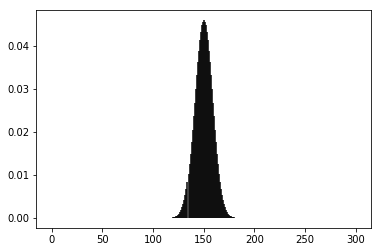

In [88]:
ber = sts.binom(300, 0.5)
x = np.linspace(0, 300, 301)
plt.vlines(x, 0,  ber.pmf(x));

In [76]:
prop.binom_test(90, 300)

3.3052458544451465e-12

In [73]:
prop.proportion_confint(90, 300)

(0.2481442271826377, 0.35185577281736224)

In [70]:
wsts._zconfint_generic(ber.mean(), ber.var()/np.sqrt(300), 0.05, 'two-sided')

(141.5131069944287, 158.4868930055713)

In [77]:
wsts.zconfint(np.array([1]*150 + [0]*150))

(0.4433261780812219, 0.5566738219187781)

In [79]:
X1 = np.array([1]*944 + [0]*(1600-944))
X2 = np.array([1]*880 + [0]*(1600-880))

In [104]:
X1.mean() - X2.mean()

0.039999999999999925

In [109]:
import scipy

In [110]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [111]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [112]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [113]:
proportions_diff_confint_ind(X1, X2)

(0.00572163631706115, 0.07427836368293869)

In [114]:
z_stat = proportions_diff_z_stat_ind(X1,X2)

In [115]:
proportions_diff_z_test(z_stat)

0.022298292683339493

In [129]:
def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

In [124]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

In [125]:
proportions_diff_confint_rel(X1, X2)

(0.03039817664728938, 0.04960182335271062)

In [126]:
z_stat_rel = proportions_diff_z_stat_rel(X1, X2)

In [127]:
proportions_diff_z_test(z_stat_rel)

2.220446049250313e-16

In [134]:
prop.proportions_ztest(X.sum(), len(X))

ValueError: value must be provided for a 1-sample test

In [135]:
X.sum()

90

In [136]:
len(X)

300

In [138]:
prop = np.asarray(X.sum()) / len(X)

In [139]:
prop

0.3

In [140]:
np.size(prop)

1

In [147]:
prop.proportions_ztest([X1.sum(), X2.sum()], [len(X1), len(X2)])

(2.285247956160165, 0.022298292683339573)

In [146]:
np.asarray([X1.sum(), X2.sum()])

array([944, 880])

In [148]:
proportions_diff_z_stat_ind(X1, X2)

2.285247956160165

In [149]:
proportions_diff_z_test(proportions_diff_z_stat_ind(X1, X2))

0.022298292683339493

In [161]:
prop.proportions_ztest(X.sum(), len(X), .5)

(-7.559289460184545, 4.052771052674053e-14)

In [150]:
sts.binom_test(X.sum(), len(X))

3.3052458544451465e-12

In [163]:
z = (X.mean() - 0.5) / np.sqrt((.5*(1-.5)/len(X)))

In [164]:
2*(sts.norm.sf(np.abs(z)))

4.262191597843629e-12

In [166]:
np.sum(np.asarray([X1.sum(), X2.sum()]))

1824